# Data wranging

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import warnings
from sklearn.compose import make_column_selector as selector

import plotly.express as px
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
from scipy import stats
from sklearn.compose import make_column_transformer
import plotly.graph_objects as go
from scipy import stats
from matplotlib.ticker import PercentFormatter
from scipy.stats import chi2_contingency

In [2]:
# load dataset

df = pd.read_csv('mental-heath-in-tech-2016_20161114.csv')

# determine types of dataframe

df.dtypes



Are you self-employed?                                                                 int64
How many employees does your company or organization have?                            object
Is your employer primarily a tech company/organization?                              float64
Is your primary role within your company related to tech/IT?                         float64
Does your employer provide mental health benefits as part of healthcare coverage?     object
                                                                                      ...   
What US state or territory do you live in?                                            object
What country do you work in?                                                          object
What US state or territory do you work in?                                            object
Which of the following best describes your work position?                             object
Do you work remotely?                                                 

In [3]:
df.shape

(1433, 63)

In [4]:
df.describe()

,Are you self-employed?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?,Do you have previous employers?,Have you ever sought treatment for a mental health issue from a mental health professional?,What is your age?
count,1433.000000,1146.000000,263.000000,287.000000,1433.000000,1433.000000,1433.000000
mean,0.200279,0.770506,0.942966,0.644599,0.882066,0.585485,34.286113
std,0.400349,0.420691,0.232350,0.479471,0.322643,0.492810,11.290931
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,28.000000
50%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,33.000000
75%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,39.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,323.000000


In [5]:
# determine the maximum amount of missing data in one column in dataframe
df.isnull().sum().max()
#output 1289

1289

In [6]:
# determine the minimum amount of missing data in one column in dataframe
df.isnull().sum().min()
#output 0

0

## Overview of inital dataset :
Dataset does include 
- 63 columns
- 1433 rows
- column with maximum rows of missing values 
    - max 1289
    - min 0

In [7]:
# drop duplicate for inital data cleanse
df = df.drop_duplicates()
df.shape[0]

1433

In [8]:
#look at all questions within the data set 
for col in df.columns:
    print(col)

Are you self-employed?
How many employees does your company or organization have?
Is your employer primarily a tech company/organization?
Is your primary role within your company related to tech/IT?
Does your employer provide mental health benefits as part of healthcare coverage?
Do you know the options for mental health care available under your employer-provided coverage?
Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?
Does your employer offer resources to learn more about mental health concerns and options for seeking help?
Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?
If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:
Do you think that discussing a mental health disorder with your employer would have negative consequences?
Do you think that disc

## First step for data cleansing
### Dataset is divided between categorical and numerical subset


In [9]:
# create subsets of dataframe based on numerical and categorical variables
df_num = df.select_dtypes(exclude='object')
df_cat = df.select_dtypes(include='object')

### Data cleaninsing of numerical data subset

In [10]:
df_num

,Are you self-employed?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?,Do you have previous employers?,Have you ever sought treatment for a mental health issue from a mental health professional?,What is your age?
0,0,1.0,NaN,NaN,1,0,39
1,0,1.0,NaN,NaN,1,1,29
2,0,1.0,NaN,NaN,1,1,38
3,1,NaN,NaN,1.0,1,1,43
4,0,0.0,1.0,NaN,1,1,43
...,...,...,...,...,...,...,...
1428,1,NaN,NaN,1.0,1,1,34
1429,1,NaN,NaN,1.0,0,0,56
1430,0,1.0,NaN,NaN,1,1,52
1431,0,0.0,1.0,NaN,1,0,30


- only the question "what is your age is taken into consideration" because other numerical values do not come with a legend and therefore cannot be analyzed.

In [11]:
# determine the size and shape of the numerical subset
df_num.shape
#output 1433,7

(1433, 7)

In [12]:
df_num.describe()

,Are you self-employed?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?,Do you have previous employers?,Have you ever sought treatment for a mental health issue from a mental health professional?,What is your age?
count,1433.000000,1146.000000,263.000000,287.000000,1433.000000,1433.000000,1433.000000
mean,0.200279,0.770506,0.942966,0.644599,0.882066,0.585485,34.286113
std,0.400349,0.420691,0.232350,0.479471,0.322643,0.492810,11.290931
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,28.000000
50%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,33.000000
75%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,39.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,323.000000


In [13]:
#Determine distribution of the age variable

# Create functions for descriptive Statistics
def measure_of_central_tendency(x):
    print("Mean, Median, and Mode are respectively:")
    return x.mean(), x.median(), 3*x.median()-2*x.mean()

def positional_statistics(x):
    print("Min,  Median, and Max. are respectively:")
    return x.min(), round(x.quantile(.50),2), x.max()

def measure_of_dispersion(x):
    print("Range, and Std. devations are respectively:")
    return x.max()-x.min(), round(x.std(),2)


def measure_of_shape(x):
    print("Skewness and Kurtosis coefficients are:")
    return round(x.skew(),2), round(x.kurt(),2)

Summary of Descriptive Statistics:
----------------------------------
Mean, Median, and Mode are respectively:
(34.28611304954641, 33.0, 30.427773900907184)
Min,  Median, and Max. are respectively:
(3, 33.0, 323)
Range, and Std. devations are respectively:
(320, 11.29)
Skewness and Kurtosis coefficients are:
(12.12, 298.69)


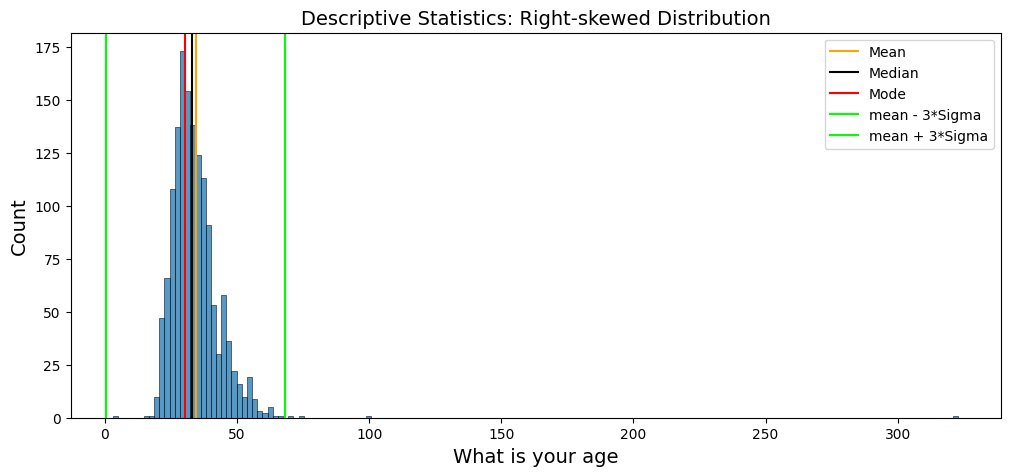

In [14]:
# visualize the distribution of the column "what is your age?"
dfv = df_num['What is your age?']
print("Summary of Descriptive Statistics:")
print("----------------------------------")
print(measure_of_central_tendency(dfv))
print(positional_statistics(dfv))
print(measure_of_dispersion(dfv))
print(measure_of_shape(dfv))

# Plot the graph
plt.figure(figsize=(12,5))
sns.histplot(dfv)
plt.axvline(dfv.mean(),color='orange',label='Mean')
plt.axvline(dfv.median(),color='black',label='Median')
plt.axvline(3*dfv.median()-2*dfv.mean(),color='red',label='Mode')
plt.axvline(dfv.mean() - 3*dfv.std(),color='lime',label= "mean - 3*Sigma")
plt.axvline(dfv.mean() + 3*dfv.std(),color='lime',label= "mean + 3*Sigma")
plt.title("Descriptive Statistics: Right-skewed Distribution", fontsize =14)
plt.xlabel('What is your age', fontsize =14)
plt.ylabel('Count', fontsize =14)
plt.legend()
plt.show()

### Dealing with missing data of numerical subset
    * age variable 
    * missing values are filled with the mean of 34

In [15]:
# fill missing values with mean
df['What is your age?'] = df['What is your age?'].fillna(34)
df['What is your age?']

0       39
1       29
2       38
3       43
4       43
        ..
1428    34
1429    56
1430    52
1431    30
1432    25
Name: What is your age?, Length: 1433, dtype: int64

In [16]:
df['What is your age?'].unique()

array([ 39,  29,  38,  43,  42,  30,  37,  44,  28,  34,  35,  52,  32,
        25,  31,  26,  33,  27,  36,  40,  46,  41,  45,  19,  21,  24,
        17,  23,  22,  51,  48,  55,  50,  49,  20,  54,  47,  56,  57,
        63,  99,  61, 323,  62,  53,  58,   3,  66,  59,  15,  65,  74,
        70])

### Detect outlier of age variable with different mehtods:
IQR [Link to Header](#IQR-method)

Z score [Link to Header](#Z-score)


### IQR method

In [17]:
#IqR method
def outlier_treatment(dfv):
 sorted(dfv)
 Q1,Q3 = np.percentile(dfv , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 return lower_range,upper_range

In [18]:
#set upper or lower bound for the age variable
lowerbound,upperbound = outlier_treatment(dfv)
dfv[(dfv < lowerbound) | (dfv > upperbound)]

303      56
304      57
308      63
372      99
440      57
484      61
519      61
564     323
591      62
649      58
656       3
701      66
710      59
745      63
774      56
872      59
885      65
900      63
1066     56
1117     74
1126     57
1167     57
1221     70
1224     63
1325     56
1429     56
Name: What is your age?, dtype: int64

In [19]:
# All entries of the age columns are deleted that are above or below the set bounds which were determined by the IQR method
dfv.drop(dfv[ (dfv > upperbound) | (dfv < lowerbound) ].index , inplace=True)
sorted(dfv.unique())
# output 15 -55

[15,
 17,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55]

In [20]:
dfv.mean()
#output 33.63 so around 34

33.62615493958778

## Z score

In [21]:
# z score is calculated and all entries are deleted that are located above and under 3 and -3 std from mean
# z score does give information on how far a data point is located from the mean
dfz =  df['What is your age?']
df["zscore"] = np.abs(stats.zscore(dfz))
df_zscore_3= df[df.zscore<3]

In [22]:
sorted(df_zscore_3['What is your age?'].unique())
#output 3-66

[3,
 15,
 17,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 61,
 62,
 63,
 65,
 66]

In [23]:
df_zscore_3['What is your age?'].mean()

33.986004198740375

# Data cleansing of categorical data subset

In [24]:
#determine the shape of the categorical dataset 
df_cat.shape
#output 1433,56

(1433, 56)

In [25]:
# drop columns with more than 70% missing value for first step 
threshold = len(df_cat)*0.70
df_cat = df_cat.dropna(thresh=threshold, axis =1)

In [26]:
#check shape after strategy on missing values
df_cat.shape
# output 43 columns 

(1433, 43)

In [27]:
df_cat.describe()

,How many employees does your company or organization have?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you feel comfortable discussing a mental health disorder with your coworkers?,...,Have you had a mental health disorder in the past?,Do you currently have a mental health disorder?,Have you been diagnosed with a mental health condition by a medical professional?,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your gender?,What country do you live in?,What country do you work in?,Which of the following best describes your work position?,Do you work remotely?
count,1146,1146,1013,1146,1146,1146,1146,1146,1146,1146,...,1433,1433,1433,1433,1433,1430,1433,1433,1433,1433
unique,6,4,3,3,3,3,6,3,3,3,...,3,3,2,5,5,70,53,53,264,3
top,26-100,Yes,No,No,No,I don't know,Somewhat easy,Maybe,No,Maybe,...,Yes,Yes,No,Not applicable to me,Often,Male,United States of America,United States of America,Back-end Developer,Sometimes
freq,292,531,354,813,531,742,281,487,837,479,...,736,575,717,557,538,610,840,851,263,757


In [28]:
#check which questions belong to the categorical subset
for column in df_cat:
    print(column)

How many employees does your company or organization have?
Does your employer provide mental health benefits as part of healthcare coverage?
Do you know the options for mental health care available under your employer-provided coverage?
Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?
Does your employer offer resources to learn more about mental health concerns and options for seeking help?
Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?
If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:
Do you think that discussing a mental health disorder with your employer would have negative consequences?
Do you think that discussing a physical health issue with your employer would have negative consequences?
Would you feel comfortable discussing a mental health di

 ## Check interesting columns
 - columns checked:
     - location 
     - workposition

In [29]:
df_cat['What country do you live in?'].value_counts()
#output: most frequent answer is USA with 840 entries

What country do you live in?
United States of America    840
United Kingdom              180
Canada                       78
Germany                      58
Netherlands                  48
Australia                    35
Sweden                       19
France                       16
Ireland                      15
Switzerland                  10
Brazil                       10
New Zealand                   9
India                         9
Russia                        9
Bulgaria                      7
Finland                       7
Denmark                       7
Italy                         5
Belgium                       5
South Africa                  4
Romania                       4
Spain                         4
Poland                        4
Austria                       4
Norway                        3
Pakistan                      3
Chile                         3
Czech Republic                3
Japan                         2
Israel                        2
Other      

In [30]:
df_cat['What country do you work in?'].value_counts()
# output: most frequent answer is USA with 851 entries

What country do you work in?
United States of America    851
United Kingdom              183
Canada                       74
Germany                      58
Netherlands                  47
Australia                    34
Sweden                       20
Ireland                      15
France                       14
Switzerland                  10
Brazil                       10
India                         9
Russia                        9
New Zealand                   9
Denmark                       7
Bulgaria                      7
Finland                       7
Belgium                       5
South Africa                  4
Poland                        4
Austria                       4
Czech Republic                3
Italy                         3
Chile                         3
Norway                        3
Romania                       3
Spain                         3
Other                         2
Bosnia and Herzegovina        2
Afghanistan                   2
Pakistan   

In [31]:
df_cat['Which of the following best describes your work position?'].value_counts()
#output: most frequent answers for front and backend developer 

Which of the following best describes your work position?
Back-end Developer                                                                                              263
Front-end Developer                                                                                             125
Other                                                                                                           112
Supervisor/Team Lead                                                                                             68
Back-end Developer|Front-end Developer                                                                           61
                                                                                                               ... 
Front-end Developer|Back-end Developer|Support|Dev Evangelist/Advocate                                            1
Front-end Developer|Back-end Developer|Support|DevOps/SysAdmin|Dev Evangelist/Advocate                            1
Other|Dev Evan

# Feature selection

Following questions will be deleted:
- why and why not 
- 'Which of the following best describes your work position?'
- 'What country do you work in?'
- 'What country do you live in?'

In [32]:
columns = ['Why or why not?', 'Why or why not?.1','Which of the following best describes your work position?', 'What country do you work in?', 'What country do you live in?' ]
df_cat = df_cat.drop(columns, axis =1)

In [33]:
df_cat.shape

(1433, 38)

# mapping of categorical variables

In [34]:
#lowercase all entries of dataset
df_cat = df_cat.apply(lambda x: x.astype(str).str.lower())
df_cat

,How many employees does your company or organization have?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you feel comfortable discussing a mental health disorder with your coworkers?,...,How willing would you be to share with friends and family that you have a mental illness?,Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?,Do you have a family history of mental illness?,Have you had a mental health disorder in the past?,Do you currently have a mental health disorder?,Have you been diagnosed with a mental health condition by a medical professional?,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your gender?,Do you work remotely?
0,26-100,not eligible for coverage / n/a,nan,no,no,i don't know,very easy,no,no,maybe,...,somewhat open,no,no,yes,no,yes,not applicable to me,not applicable to me,male,sometimes
1,6-25,no,yes,yes,yes,yes,somewhat easy,no,no,maybe,...,somewhat open,no,yes,yes,yes,yes,rarely,sometimes,male,never
2,6-25,no,nan,no,no,i don't know,neither easy nor difficult,maybe,no,maybe,...,somewhat open,maybe/not sure,no,maybe,no,no,not applicable to me,not applicable to me,male,always
3,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,neutral,no,no,yes,yes,yes,sometimes,sometimes,male,sometimes
4,6-25,yes,yes,no,no,no,neither easy nor difficult,yes,maybe,maybe,...,somewhat open,"yes, i experienced",yes,yes,yes,yes,sometimes,sometimes,female,sometimes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,somewhat open,maybe/not sure,yes,no,no,no,not applicable to me,not applicable to me,female,sometimes
1429,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,somewhat not open,maybe/not sure,yes,no,no,yes,sometimes,often,male,sometimes
1430,100-500,yes,yes,yes,yes,i don't know,somewhat difficult,maybe,maybe,yes,...,somewhat open,"yes, i observed",yes,yes,maybe,yes,rarely,sometimes,male,sometimes
1431,100-500,i don't know,i am not sure,no,yes,i don't know,somewhat difficult,maybe,no,maybe,...,somewhat open,"yes, i experienced",yes,maybe,yes,yes,sometimes,often,female,sometimes


In [35]:
# unique  missing values as np.nan
df_cat = df_cat.replace('nan', np.nan)

In [36]:
#check remaining column in categorical dataset
for column in df_cat:
    print(column)

How many employees does your company or organization have?
Does your employer provide mental health benefits as part of healthcare coverage?
Do you know the options for mental health care available under your employer-provided coverage?
Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?
Does your employer offer resources to learn more about mental health concerns and options for seeking help?
Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?
If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:
Do you think that discussing a mental health disorder with your employer would have negative consequences?
Do you think that discussing a physical health issue with your employer would have negative consequences?
Would you feel comfortable discussing a mental health di

In [37]:
# rename columns of categrorical subset
df_cat = df_cat.rename(columns = {
    'How many employees does your company or organization have?' : 'company_size',
    'Does your employer provide mental health benefits as part of healthcare coverage?' : 'mental_health_benefit_employer',
    'Do you know the options for mental health care available under your employer-provided coverage?' : 'knowledge_mh_care_employer',
    'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?' : 'disc_emp_mental_health',
    'Does your employer offer resources to learn more about mental health concerns and options for seeking help?' : 'employer_mh_resoureces',
    'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?' : 'anonymity_mh_care',
    'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:' : 'mh_leave_request',
    'Do you think that discussing a mental health disorder with your employer would have negative consequences?' : 'mh_disoder_neg_consequences',
    'Do you think that discussing a physical health issue with your employer would have negative consequences?' : 'ph_disoder_neg_consequences',
    'Would you feel comfortable discussing a mental health disorder with your coworkers?' : 'comfortable_dicuss_mhd_coworkers',
    'Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?' : 'comfortable_dicuss_mhd_supervisor',
    'Do you feel that your employer takes mental health as seriously as physical health?' : 'mh_equal_to_ph',
    'Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?' : 'when_open_mhd_neg_consequences',
    'Have your previous employers provided mental health benefits?': 'prev_emp_mh_benefits',
    'Were you aware of the options for mental health care provided by your previous employers?' : 'awareness_mh_benefits_prev_emp',
    'Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?' : 'discuss_prev_empl_mh',
    'Did your previous employers provide resources to learn more about mental health issues and how to seek help?' : 'prev_empl_privde_recources_mh',
    'Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?' : 'anonymity_mh_treatment_prev_empl',
    'Do you think that discussing a mental health disorder with previous employers would have negative consequences?' : 'prev_empl_discuss_mhd_neg',
    'Do you think that discussing a physical health issue with previous employers would have negative consequences?' : 'prev_empl_discuss_phd_neg',
    'Would you have been willing to discuss a mental health issue with your previous co-workers?' : 'willing_discuss_mh_coworker',
    'Would you have been willing to discuss a mental health issue with your direct supervisor(s)?' : 'willing_discuss_mh_supervisor',
    'Did you feel that your previous employers took mental health as seriously as physical health?' : 'prev_empl_mh_equal_ph',
    'Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?' : 'observe_neg_cons_mh_prev_empl',
    'Would you be willing to bring up a physical health issue with a potential employer in an interview?' : 'willing_discuss_ph_potent_empl',
    'Would you bring up a mental health issue with a potential employer in an interview?' : 'willing_discuss_mh_potent_empl',
    'Do you feel that being identified as a person with a mental health issue would hurt your career?' : 'mhd_hurt_career',
    'Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?' : 'neg_view_coworker_mhd',
    'How willing would you be to share with friends and family that you have a mental illness?' : 'willing_share_mhd_family_friends',
    'Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?' :'unsupportive_mhd_prev_empl',
    'Do you have a family history of mental illness?' : 'family_history_mhd',
    'Have you had a mental health disorder in the past?' : 'mhd_past',
    'Do you currently have a mental health disorder?' : 'mhd_currently',
    'Have you been diagnosed with a mental health condition by a medical professional?': 'mhd_diagnosed',
    'If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?' : 'mhd_interferes_work_treated',
    'If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?': 'mhd_interferes_work_untreated',
    'What is your gender?': 'gender',
    'Do you work remotely?': 'work_remotely',
    'What country do you work in?': 'country_work',
    'What country do you live in?' : 'country_live'
})

In [38]:
# security safety copy of categorical dataset
df_cat2 = df_cat.copy()

In [39]:
df_cat.isnull().sum()

company_size                         287
mental_health_benefit_employer       287
knowledge_mh_care_employer           420
disc_emp_mental_health               287
employer_mh_resoureces               287
anonymity_mh_care                    287
mh_leave_request                     287
mh_disoder_neg_consequences          287
ph_disoder_neg_consequences          287
comfortable_dicuss_mhd_coworkers     287
comfortable_dicuss_mhd_supervisor    287
mh_equal_to_ph                       287
when_open_mhd_neg_consequences       287
prev_emp_mh_benefits                 169
awareness_mh_benefits_prev_emp       169
discuss_prev_empl_mh                 169
prev_empl_privde_recources_mh        169
anonymity_mh_treatment_prev_empl     169
prev_empl_discuss_mhd_neg            169
prev_empl_discuss_phd_neg            169
willing_discuss_mh_coworker          169
willing_discuss_mh_supervisor        169
prev_empl_mh_equal_ph                169
observe_neg_cons_mh_prev_empl        169
willing_discuss_

In [40]:
#check unique entries in dataset
for column in df_cat.columns:
    print(df_cat[column].unique())

['26-100' '6-25' nan 'more than 1000' '100-500' '500-1000' '1-5']
['not eligible for coverage / n/a' 'no' nan 'yes' "i don't know"]
[nan 'yes' 'i am not sure' 'no']
['no' 'yes' nan "i don't know"]
['no' 'yes' nan "i don't know"]
["i don't know" 'yes' nan 'no']
['very easy' 'somewhat easy' 'neither easy nor difficult' nan
 'very difficult' 'somewhat difficult' "i don't know"]
['no' 'maybe' nan 'yes']
['no' nan 'maybe' 'yes']
['maybe' nan 'yes' 'no']
['yes' 'maybe' nan 'no']
["i don't know" 'yes' nan 'no']
['no' nan 'yes']
['no, none did' 'yes, they all did' 'some did' "i don't know" nan]
['n/a (not currently aware)' 'i was aware of some'
 'yes, i was aware of all of them' 'no, i only became aware later' nan]
["i don't know" 'none did' 'some did' nan 'yes, they all did']
['none did' 'some did' nan 'yes, they all did']
["i don't know" 'yes, always' 'sometimes' 'no' nan]
['some of them' 'none of them' "i don't know" 'yes, all of them' nan]
['none of them' 'some of them' 'yes, all of them' 

In [41]:
# dictionary to map answers with same meaning into unified answers
answer_mapping = {
    'no, none did' : 'no', 
    'none did' : 'no',
    'no' : 'no',
    'no, i only became aware later' : 'no',
    'no, they do not' :'no' ,
    'no, it has not' : 'no',
    'none of them' : 'no',
    'no, at none of my previous employers' : 'no',
    'never' : 'no',
    'somewhat not open' : 'no',
    "no, i don't think it would" : 'no',
    'rarely' : 'rarely',
    "no, i don't think they would" : 'no',
    "i don't know" : 'neutral',
    'neutral' : 'neutral',
    'not applicable to me (i do not have a mental illness)' : 'neutral', 
    'maybe/not sure' : 'neutral', 
    'maybe' : 'neutral',
    'not applicable to me' : 'neutral',
    'not eligible for coverage / n/a' : 'neutral',
    'i am not sure' :'neutral',
    'n/a (not currently aware)' : 'neutral',
    'neither easy nor difficult' : 'neutral',           
    'some of them' : 'some',
    'some of my previous employers' : 'some',
    'some did' : 'some',
    'sometimes' : 'some',
    'yes, i think they would': 'yes',
    'i was aware of some' : 'yes',
    'yes, i think it would' : 'yes',
    'yes, they all did' : 'yes', 
    'yes, i was aware of all of them' : 'yes',
    'yes, all of them' : 'yes',
    'yes, at all of my previous employers' : 'yes',
    'yes, i experienced' : 'yes',
    'yes, i observed' : 'yes',
    'yes' : 'yes', 
    'yes, it has': 'yes',
    'yes, they do' : 'yes',
    'often' :'yes',
    'always' :'yes',
    'somewhat open': 'some',
    'neutral' : 'neutral',
    'not applicable to me (i do not have a mental illness)': 'neutral',
    'very open' : 'yes',
    'not open at all': 'no', 'somewhat not open' : 'rarely',
    'very easy': 'yes',
    'somewhat easy': 'some',
    'neither easy nor difficult':'neutral',
    'very difficult': 'no',
    'somewhat difficult':'rarely',
    "i don't know": 'neutral'
}



In [42]:
# drop columns with differnt types of answers temporarely to apply answer mapping
df_cat = df_cat.drop(df_cat[['company_size','gender']], axis= 1)
df_cat

,mental_health_benefit_employer,knowledge_mh_care_employer,disc_emp_mental_health,employer_mh_resoureces,anonymity_mh_care,mh_leave_request,mh_disoder_neg_consequences,ph_disoder_neg_consequences,comfortable_dicuss_mhd_coworkers,comfortable_dicuss_mhd_supervisor,...,neg_view_coworker_mhd,willing_share_mhd_family_friends,unsupportive_mhd_prev_empl,family_history_mhd,mhd_past,mhd_currently,mhd_diagnosed,mhd_interferes_work_treated,mhd_interferes_work_untreated,work_remotely
0,not eligible for coverage / n/a,NaN,no,no,i don't know,very easy,no,no,maybe,yes,...,"no, i don't think they would",somewhat open,no,no,yes,no,yes,not applicable to me,not applicable to me,sometimes
1,no,yes,yes,yes,yes,somewhat easy,no,no,maybe,yes,...,"no, i don't think they would",somewhat open,no,yes,yes,yes,yes,rarely,sometimes,never
2,no,NaN,no,no,i don't know,neither easy nor difficult,maybe,no,maybe,maybe,...,maybe,somewhat open,maybe/not sure,no,maybe,no,no,not applicable to me,not applicable to me,always
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,maybe,neutral,no,no,yes,yes,yes,sometimes,sometimes,sometimes
4,yes,yes,no,no,no,neither easy nor difficult,yes,maybe,maybe,no,...,maybe,somewhat open,"yes, i experienced",yes,yes,yes,yes,sometimes,sometimes,sometimes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,maybe,somewhat open,maybe/not sure,yes,no,no,no,not applicable to me,not applicable to me,sometimes
1429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"yes, i think they would",somewhat not open,maybe/not sure,yes,no,no,yes,sometimes,often,sometimes
1430,yes,yes,yes,yes,i don't know,somewhat difficult,maybe,maybe,yes,yes,...,"no, i don't think they would",somewhat open,"yes, i observed",yes,yes,maybe,yes,rarely,sometimes,sometimes
1431,i don't know,i am not sure,no,yes,i don't know,somewhat difficult,maybe,no,maybe,yes,...,"no, i don't think they would",somewhat open,"yes, i experienced",yes,maybe,yes,yes,sometimes,often,sometimes


In [43]:
#check if deletion was successful
for column in df_cat:
    print(column)

mental_health_benefit_employer
knowledge_mh_care_employer
disc_emp_mental_health
employer_mh_resoureces
anonymity_mh_care
mh_leave_request
mh_disoder_neg_consequences
ph_disoder_neg_consequences
comfortable_dicuss_mhd_coworkers
comfortable_dicuss_mhd_supervisor
mh_equal_to_ph
when_open_mhd_neg_consequences
prev_emp_mh_benefits
awareness_mh_benefits_prev_emp
discuss_prev_empl_mh
prev_empl_privde_recources_mh
anonymity_mh_treatment_prev_empl
prev_empl_discuss_mhd_neg
prev_empl_discuss_phd_neg
willing_discuss_mh_coworker
willing_discuss_mh_supervisor
prev_empl_mh_equal_ph
observe_neg_cons_mh_prev_empl
willing_discuss_ph_potent_empl
willing_discuss_mh_potent_empl
mhd_hurt_career
neg_view_coworker_mhd
willing_share_mhd_family_friends
unsupportive_mhd_prev_empl
family_history_mhd
mhd_past
mhd_currently
mhd_diagnosed
mhd_interferes_work_treated
mhd_interferes_work_untreated
work_remotely


In [44]:
# Apply mapping to categorical dataset


df_new = pd.DataFrame()
for col in df_cat.columns:
    df_new[col] = df_cat[col].map(answer_mapping)
    
df_cat = df_new
df_cat

,mental_health_benefit_employer,knowledge_mh_care_employer,disc_emp_mental_health,employer_mh_resoureces,anonymity_mh_care,mh_leave_request,mh_disoder_neg_consequences,ph_disoder_neg_consequences,comfortable_dicuss_mhd_coworkers,comfortable_dicuss_mhd_supervisor,...,neg_view_coworker_mhd,willing_share_mhd_family_friends,unsupportive_mhd_prev_empl,family_history_mhd,mhd_past,mhd_currently,mhd_diagnosed,mhd_interferes_work_treated,mhd_interferes_work_untreated,work_remotely
0,neutral,NaN,no,no,neutral,yes,no,no,neutral,yes,...,no,some,no,no,yes,no,yes,neutral,neutral,some
1,no,yes,yes,yes,yes,some,no,no,neutral,yes,...,no,some,no,yes,yes,yes,yes,rarely,some,no
2,no,NaN,no,no,neutral,neutral,neutral,no,neutral,neutral,...,neutral,some,neutral,no,neutral,no,no,neutral,neutral,yes
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,neutral,neutral,no,no,yes,yes,yes,some,some,some
4,yes,yes,no,no,no,neutral,yes,neutral,neutral,no,...,neutral,some,yes,yes,yes,yes,yes,some,some,some
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,neutral,some,neutral,yes,no,no,no,neutral,neutral,some
1429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,yes,rarely,neutral,yes,no,no,yes,some,yes,some
1430,yes,yes,yes,yes,neutral,rarely,neutral,neutral,yes,yes,...,no,some,yes,yes,yes,neutral,yes,rarely,some,some
1431,neutral,neutral,no,yes,neutral,rarely,neutral,no,neutral,yes,...,no,some,yes,yes,neutral,yes,yes,some,yes,some


In [45]:
# implement gender column in cat dataframe
df_cat['gender'] = df_cat2['gender']

In [46]:
# check for unique entries in geneder variable
df_cat['gender'].unique()

array(['male', 'male ', 'female', 'm', 'i identify as female.', 'female ',
       'bigender', 'non-binary', 'female assigned at birth ', 'f',
       'woman', 'man', 'fm', 'cis female ', 'transitioned, m2f',
       'genderfluid (born female)', 'other/transfeminine',
       'female or multi-gender femme', 'female/woman', 'cis male',
       'male.', 'androgynous', 'male 9:1 female, roughly', nan,
       'male (cis)', 'other', 'nb masculine', 'cisgender female',
       'sex is male', 'none of your business', 'genderqueer', 'human',
       'genderfluid', 'enby', 'malr', 'genderqueer woman', 'mtf', 'queer',
       'agender', 'dude', 'fluid',
       "i'm a man why didn't you make this a drop down question. you should of asked sex? and i would of answered yes please. seriously how much text can this take? ",
       'mail', 'm|', 'male/genderqueer', 'fem', 'nonbinary',
       'female (props for making this a freeform field, though)',
       ' female', 'unicorn', 'male (trans, ftm)', 'cis-woman'

In [47]:
#generate dictionary for gender mapping
gender_mapping = {
  'Male' : 'male', 'male' : 'male', 'Female' : 'female', 'M' : 'male', 'female' : 'female', 'm' : 'male', 'I identify as female.' : 'female', 'female ' : 'female',
    'Bigender' : 'other',  'non-binary' : 'other', 'Female assigned at birth ' : 'female', 'F' : 'female', 'Woman' : 'female', 'man' : 'male', 'fm' :'female', 'f' :'female',
    'Cis female ': 'female', 'Transitioned, M2F' : 'other', 'Genderfluid (born female)' : 'other', 'Other/Transfeminine': 'other',
    'Female or Multi-Gender Femme' : 'other', 'Female ' : 'female', 'woman' : 'female', 'female/woman':'female', 'Cis male' :'male', 'Male.' :'male', 'Androgynous':'other',
    'male 9:1 female, roughly' :'other', 'Male (cis)':'male',  'Other':'other', 'nb masculine' :'other', 'Cisgender Female':'female', 'Man':'male', 'Sex is male':'male',
     'none of your business':'other', 'genderqueer':'other', 'cis male':'male', 'Human':'other', 'Genderfluid':'other', 'Enby':'other', 'Malr':'other', 'genderqueer woman':'other',
    'mtf':'other', 'Queer':'other',  'Agender':'other',  'Dude':'male', 'Fluid':'other', "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ":'male',
    'mail' :'other',  'M|':'male',  'Male/genderqueer':'other', 'fem':'female', 'Nonbinary':'other',  'male ':'male', 'human':'other', 'Female (props for making this a freeform field, though)':'female',
    ' Female':'female', 'Unicorn':'other', 'Cis Male':'male', 'Male (trans, FtM)':'other', 'Cis-woman':'female','Genderqueer':'other','cisdude':'male','Genderflux demi-girl':'other',
    'female-bodied; no feelings about gender':'other', 'cis man':'male', 'AFAB': 'other',  'Transgender woman':'other', 'MALE':'male'
}

In [48]:
# apply mapping on gender variable
df_cat['gender'] = df_cat['gender'].map(gender_mapping)

In [49]:
# implement company size into the categorical dataset
df_cat['company_size'] = df_cat2['company_size']
df_cat['company_size'].head()

0    26-100
1      6-25
2      6-25
3       NaN
4      6-25
Name: company_size, dtype: object

## Dealing with missing data on categorical data 
- filled NaN with mode for each column

In [50]:
# fill nan with mode for each column
for column in df_cat.columns:
    df_cat[column] = df_cat[column].fillna(df_cat[column].mode()[0])

In [51]:
df_cat.isnull().sum()

mental_health_benefit_employer       0
knowledge_mh_care_employer           0
disc_emp_mental_health               0
employer_mh_resoureces               0
anonymity_mh_care                    0
mh_leave_request                     0
mh_disoder_neg_consequences          0
ph_disoder_neg_consequences          0
comfortable_dicuss_mhd_coworkers     0
comfortable_dicuss_mhd_supervisor    0
mh_equal_to_ph                       0
when_open_mhd_neg_consequences       0
prev_emp_mh_benefits                 0
awareness_mh_benefits_prev_emp       0
discuss_prev_empl_mh                 0
prev_empl_privde_recources_mh        0
anonymity_mh_treatment_prev_empl     0
prev_empl_discuss_mhd_neg            0
prev_empl_discuss_phd_neg            0
willing_discuss_mh_coworker          0
willing_discuss_mh_supervisor        0
prev_empl_mh_equal_ph                0
observe_neg_cons_mh_prev_empl        0
willing_discuss_ph_potent_empl       0
willing_discuss_mh_potent_empl       0
mhd_hurt_career          

### Merge numerical data with categorical data

In [52]:
# concatenate numerical and categorical subset
data = pd.concat([df_cat, df_num['What is your age?']], axis =1)
data

,mental_health_benefit_employer,knowledge_mh_care_employer,disc_emp_mental_health,employer_mh_resoureces,anonymity_mh_care,mh_leave_request,mh_disoder_neg_consequences,ph_disoder_neg_consequences,comfortable_dicuss_mhd_coworkers,comfortable_dicuss_mhd_supervisor,...,family_history_mhd,mhd_past,mhd_currently,mhd_diagnosed,mhd_interferes_work_treated,mhd_interferes_work_untreated,work_remotely,gender,company_size,What is your age?
0,neutral,no,no,no,neutral,yes,no,no,neutral,yes,...,no,yes,no,yes,neutral,neutral,some,male,26-100,39
1,no,yes,yes,yes,yes,some,no,no,neutral,yes,...,yes,yes,yes,yes,rarely,some,no,male,6-25,29
2,no,no,no,no,neutral,neutral,neutral,no,neutral,neutral,...,no,neutral,no,no,neutral,neutral,yes,male,6-25,38
3,yes,no,no,no,neutral,neutral,neutral,no,neutral,yes,...,no,yes,yes,yes,some,some,some,male,26-100,43
4,yes,yes,no,no,no,neutral,yes,neutral,neutral,no,...,yes,yes,yes,yes,some,some,some,female,6-25,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428,yes,no,no,no,neutral,neutral,neutral,no,neutral,yes,...,yes,no,no,no,neutral,neutral,some,female,26-100,34
1429,yes,no,no,no,neutral,neutral,neutral,no,neutral,yes,...,yes,no,no,yes,some,yes,some,male,26-100,56
1430,yes,yes,yes,yes,neutral,rarely,neutral,neutral,yes,yes,...,yes,yes,neutral,yes,rarely,some,some,male,100-500,52
1431,neutral,neutral,no,yes,neutral,rarely,neutral,no,neutral,yes,...,yes,neutral,yes,yes,some,yes,some,female,100-500,30


In [53]:
data['What is your age?'].unique()

array([ 39,  29,  38,  43,  42,  30,  37,  44,  28,  34,  35,  52,  32,
        25,  31,  26,  33,  27,  36,  40,  46,  41,  45,  19,  21,  24,
        17,  23,  22,  51,  48,  55,  50,  49,  20,  54,  47,  56,  57,
        63,  99,  61, 323,  62,  53,  58,   3,  66,  59,  15,  65,  74,
        70])

### Dealing with outlier for age variable. 
#### IQR method and Z score did not give context oriented results therefore this variable is cut for values between 70 and above 18 manually

In [54]:
#context oriented outlier selection for age variable
data = data[(data['What is your age?'] <= 70) & (data['What is your age?'] > 18)]
data

,mental_health_benefit_employer,knowledge_mh_care_employer,disc_emp_mental_health,employer_mh_resoureces,anonymity_mh_care,mh_leave_request,mh_disoder_neg_consequences,ph_disoder_neg_consequences,comfortable_dicuss_mhd_coworkers,comfortable_dicuss_mhd_supervisor,...,family_history_mhd,mhd_past,mhd_currently,mhd_diagnosed,mhd_interferes_work_treated,mhd_interferes_work_untreated,work_remotely,gender,company_size,What is your age?
0,neutral,no,no,no,neutral,yes,no,no,neutral,yes,...,no,yes,no,yes,neutral,neutral,some,male,26-100,39
1,no,yes,yes,yes,yes,some,no,no,neutral,yes,...,yes,yes,yes,yes,rarely,some,no,male,6-25,29
2,no,no,no,no,neutral,neutral,neutral,no,neutral,neutral,...,no,neutral,no,no,neutral,neutral,yes,male,6-25,38
3,yes,no,no,no,neutral,neutral,neutral,no,neutral,yes,...,no,yes,yes,yes,some,some,some,male,26-100,43
4,yes,yes,no,no,no,neutral,yes,neutral,neutral,no,...,yes,yes,yes,yes,some,some,some,female,6-25,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428,yes,no,no,no,neutral,neutral,neutral,no,neutral,yes,...,yes,no,no,no,neutral,neutral,some,female,26-100,34
1429,yes,no,no,no,neutral,neutral,neutral,no,neutral,yes,...,yes,no,no,yes,some,yes,some,male,26-100,56
1430,yes,yes,yes,yes,neutral,rarely,neutral,neutral,yes,yes,...,yes,yes,neutral,yes,rarely,some,some,male,100-500,52
1431,neutral,neutral,no,yes,neutral,rarely,neutral,no,neutral,yes,...,yes,neutral,yes,yes,some,yes,some,female,100-500,30


Summary of Descriptive Statistics:
----------------------------------
Mean, Median, and Mode are respectively:
(34.05816398037842, 33.0, 30.883672039243166)
Min,  Median, and Max. are respectively:
(19, 33.0, 70)
Range, and Std. devations are respectively:
(51, 8.02)
Skewness and Kurtosis coefficients are:
(0.89, 0.97)


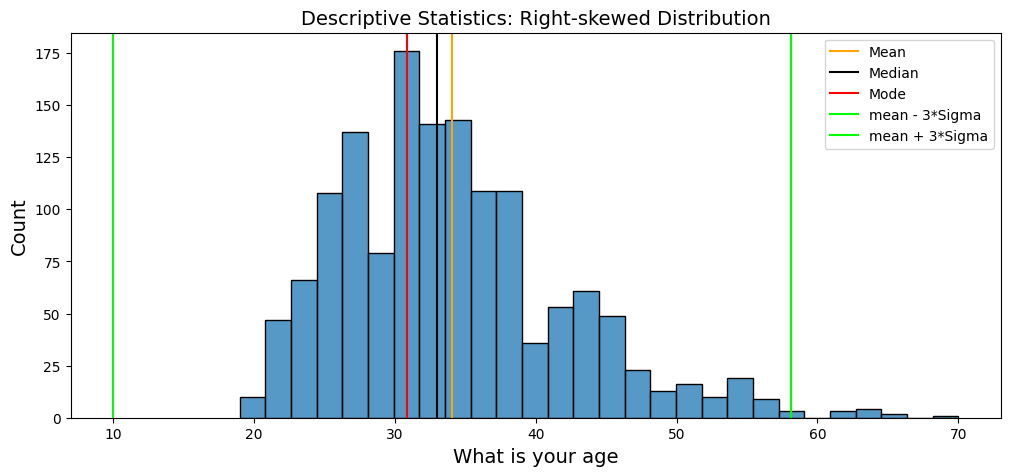

In [55]:
# visualize the distribution of the column "what is your age?"
dfv = data['What is your age?']
print("Summary of Descriptive Statistics:")
print("----------------------------------")
print(measure_of_central_tendency(dfv))
print(positional_statistics(dfv))
print(measure_of_dispersion(dfv))
print(measure_of_shape(dfv))

# Plot the graph
plt.figure(figsize=(12,5))
sns.histplot(dfv)
plt.axvline(dfv.mean(),color='orange',label='Mean')
plt.axvline(dfv.median(),color='black',label='Median')
plt.axvline(3*dfv.median()-2*dfv.mean(),color='red',label='Mode')
plt.axvline(dfv.mean() - 3*dfv.std(),color='lime',label= "mean - 3*Sigma")
plt.axvline(dfv.mean() + 3*dfv.std(),color='lime',label= "mean + 3*Sigma")
plt.title("Descriptive Statistics: Right-skewed Distribution", fontsize =14)
plt.xlabel('What is your age', fontsize =14)
plt.ylabel('Count', fontsize =14)
plt.legend()
plt.show()

In [56]:
# scale age variable
scaler = MinMaxScaler()
data[['age_scaled']] = scaler.fit_transform(data[['What is your age?']])
data

/var/folders/pq/5_lw1tn96g5bj16hsbwk085c0000gn/T/ipykernel_1921/2413345388.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['age_scaled']] = scaler.fit_transform(data[['What is your age?']])


,mental_health_benefit_employer,knowledge_mh_care_employer,disc_emp_mental_health,employer_mh_resoureces,anonymity_mh_care,mh_leave_request,mh_disoder_neg_consequences,ph_disoder_neg_consequences,comfortable_dicuss_mhd_coworkers,comfortable_dicuss_mhd_supervisor,...,mhd_past,mhd_currently,mhd_diagnosed,mhd_interferes_work_treated,mhd_interferes_work_untreated,work_remotely,gender,company_size,What is your age?,age_scaled
0,neutral,no,no,no,neutral,yes,no,no,neutral,yes,...,yes,no,yes,neutral,neutral,some,male,26-100,39,0.392157
1,no,yes,yes,yes,yes,some,no,no,neutral,yes,...,yes,yes,yes,rarely,some,no,male,6-25,29,0.196078
2,no,no,no,no,neutral,neutral,neutral,no,neutral,neutral,...,neutral,no,no,neutral,neutral,yes,male,6-25,38,0.372549
3,yes,no,no,no,neutral,neutral,neutral,no,neutral,yes,...,yes,yes,yes,some,some,some,male,26-100,43,0.470588
4,yes,yes,no,no,no,neutral,yes,neutral,neutral,no,...,yes,yes,yes,some,some,some,female,6-25,43,0.470588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428,yes,no,no,no,neutral,neutral,neutral,no,neutral,yes,...,no,no,no,neutral,neutral,some,female,26-100,34,0.294118
1429,yes,no,no,no,neutral,neutral,neutral,no,neutral,yes,...,no,no,yes,some,yes,some,male,26-100,56,0.725490
1430,yes,yes,yes,yes,neutral,rarely,neutral,neutral,yes,yes,...,yes,neutral,yes,rarely,some,some,male,100-500,52,0.647059
1431,neutral,neutral,no,yes,neutral,rarely,neutral,no,neutral,yes,...,neutral,yes,yes,some,yes,some,female,100-500,30,0.215686


# Data Visualization


Text(0.5, 1.0, 'Distribution of participants gender')

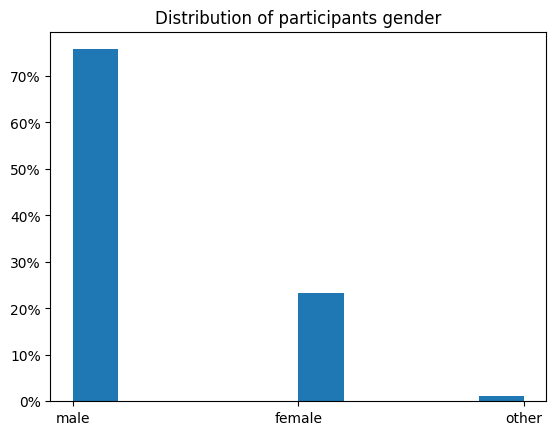

In [57]:
#gender count plot in percentage as histogram
plt.hist(data['gender'], weights=np.ones(len(data)) / len(data))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.title('Distribution of participants gender')

<Axes: >

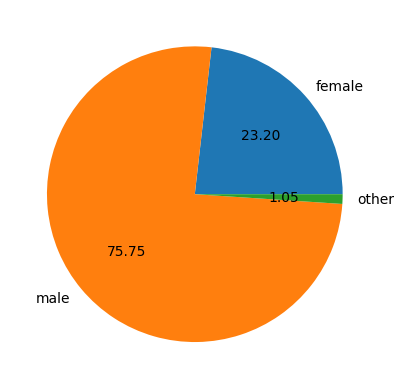

In [58]:
# pie chart for gender distribution
data.groupby('gender').size().plot(kind='pie', autopct='%.2f')

# Divide dataset in logical subsets
subsets with visualizations:

Interference [Link to Header](#Interference)

MHD history [Link to Header](#Mhd-history)

Benefits [Link to Header](#Benefits)

## Interference

In [59]:
#map categroical answers in numeric values
mapping = { 'neutral': 1, 'some': 2, 'yes': 3, 'rarely':4, 'no':5}
print(mapping)

{'neutral': 1, 'some': 2, 'yes': 3, 'rarely': 4, 'no': 5}


In [79]:
#Multi-Color Parallel Categories Diagram
# Create dimensions
import plotly.graph_objects as go
untreated_dim = go.parcats.Dimension(
    values=data.mhd_interferes_work_untreated,
    categoryorder='category ascending', label="Work interference untreated"
)

treated_dim = go.parcats.Dimension(
    values=data.mhd_interferes_work_treated, label="Work interference treated")

current_dim= go.parcats.Dimension(
    values=data.mhd_currently, label="MhD currently")



# Create parcats trace
mapping = { 'neutral': 1, 'some': 2, 'yes': 3, 'rarely':4, 'no':5}
data['col_untreated'] = data['mhd_interferes_work_untreated'].map(mapping)
color = data.col_untreated;
colorscale = [[0, 'green'],[0.25, 'magenta'],[0.5, 'blue'], [0.75, 'yellow'], [1,'red']];

fig = go.Figure(data = [go.Parcats(dimensions=[untreated_dim, current_dim, treated_dim],
        line={'color': color, 'colorscale': colorscale},
        hoveron='color', hoverinfo='count+probability',
        labelfont={'size': 18, 'family': 'Times'},
        tickfont={'size': 16, 'family': 'Times'},
        arrangement='freeform')])

fig.show()

/var/folders/pq/5_lw1tn96g5bj16hsbwk085c0000gn/T/ipykernel_1921/1474211214.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Mhd history

In [61]:
# check unique entries for "currently mental health issue"
data.mhd_currently.unique()

array(['no', 'yes', 'neutral'], dtype=object)

In [62]:
#logical subset
mh_history = data[[
    'family_history_mhd',
    'mhd_past',
    'mhd_currently',
    'mhd_diagnosed'
]]

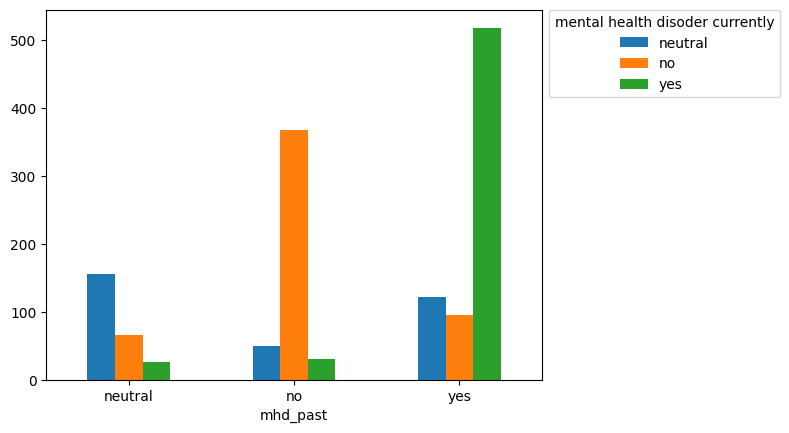

In [63]:
# crosstab plot mhd currently vs mhd past
ax = pd.crosstab(mh_history.mhd_past, mh_history.mhd_currently).plot(kind='bar', rot=0)
ax.legend(title='mental health disoder currently', bbox_to_anchor=(1, 1.02), loc='upper left')

In [64]:
#Multi-Color Parallel Categories Diagram
# Create dimensions
import plotly.graph_objects as go
past_dim = go.parcats.Dimension(
    values=data.mhd_past,
    categoryorder='category ascending', label="Mental disoder in past"
)

current_dim = go.parcats.Dimension(
    values=data.mhd_currently, label="Mental disorder currently")

diagnosed_dim  = go.parcats.Dimension(
    values=data.mhd_diagnosed, label="Mental disorder diagnosed")

# Create parcats trace
mapping = { 'neutral': 1, 'yes': 2,  'no':3 }
data['col_past_dim'] = data['mhd_past'].map(mapping)
color = data.col_past_dim;
colorscale = [[0, 'green'],[0.5, 'blue'], [1,'red']];

fig = go.Figure(data = [go.Parcats(dimensions=[past_dim, current_dim, diagnosed_dim],
        line={'color': color, 'colorscale': colorscale},
        hoveron='color', hoverinfo='count+probability',
        labelfont={'size': 18, 'family': 'Times'},
        tickfont={'size': 16, 'family': 'Times'},
        arrangement='freeform')])

fig.show()

/var/folders/pq/5_lw1tn96g5bj16hsbwk085c0000gn/T/ipykernel_1921/469348972.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



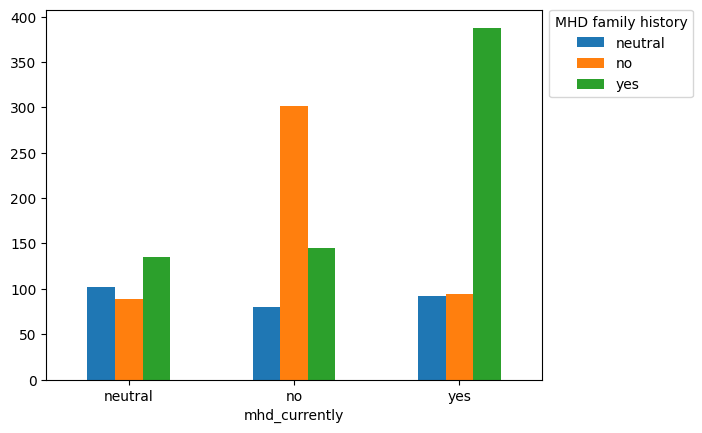

In [65]:
# crosstab plot mhd currently vs mhd family history
ax = pd.crosstab(mh_history.mhd_currently, mh_history.family_history_mhd).plot(kind='bar', rot=0)
ax.legend(title='MHD family history', bbox_to_anchor=(1, 1.02), loc='upper left')

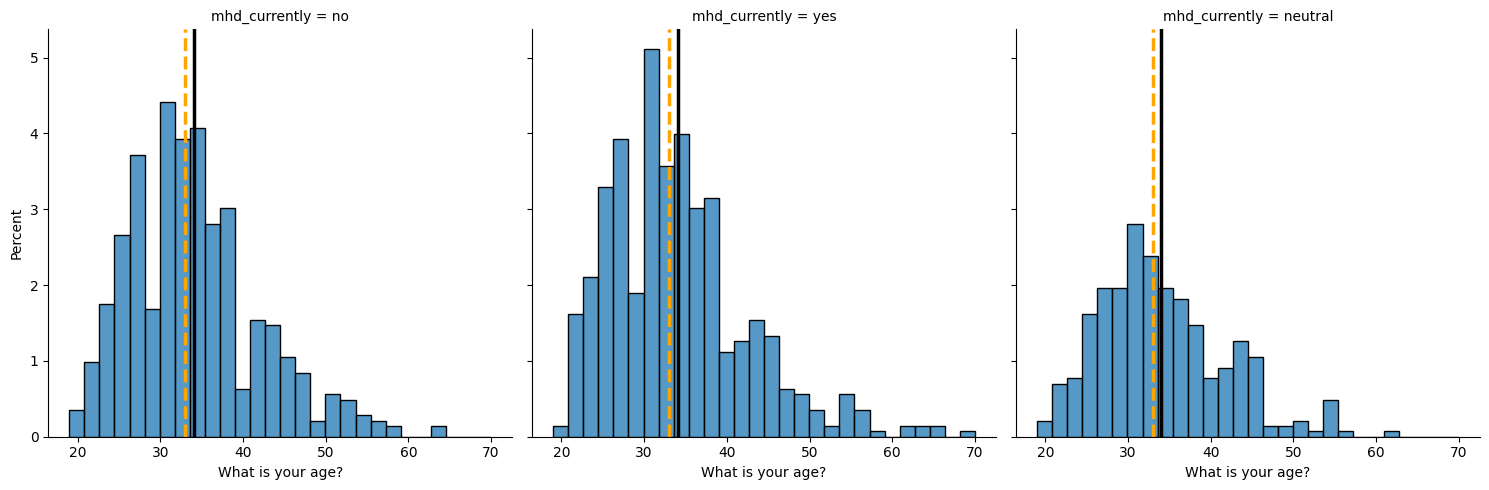

In [66]:
# distrobution plot : age against mhd_currently seperated
g = sns.displot(
    data, x="What is your age?",stat='percent', col="mhd_currently")
# function to add mean and median lines
def specs(x, **kwargs):
    plt.axvline(x.mean(), c='k', ls='-', lw=2.5)
    plt.axvline(x.median(), c='orange', ls='--', lw=2.5)
g.map(specs,"What is your age?" )

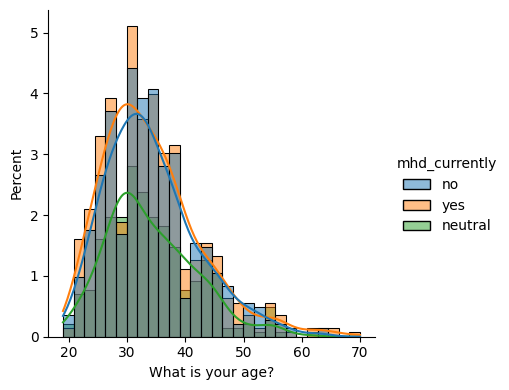

In [67]:
# stecked distrobution plot age vs mhd currently- verry unclear
sns.displot(data=data, x='What is your age?', stat='percent', hue='mhd_currently', height=4, kde=True, kind='hist')

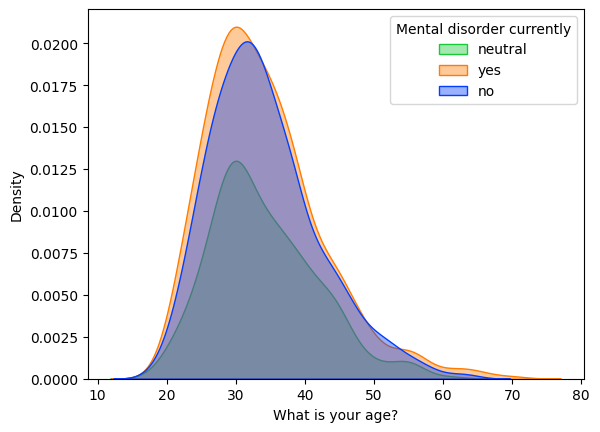

In [68]:
# distribution plot: age against mental disorder currelty overlapping
ax = sns.kdeplot(data,x="What is your age?", hue="mhd_currently", fill=True, palette = 'bright', alpha = 0.4,
                 linewidth = 1, legend = False)
plt.legend(title='Mental disorder currently', loc='upper right', labels=['neutral', 'yes','no'])
plt.show(ax)

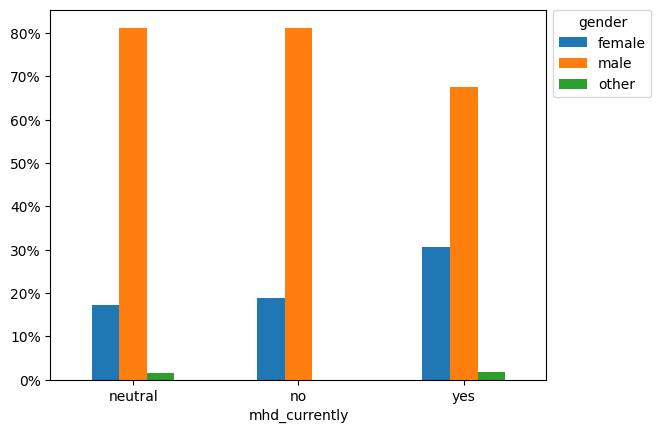

In [69]:
#crosstable gender against mhd currently
ax = pd.crosstab(data.mhd_currently, data.gender,normalize='index').plot(kind='bar', rot=0)
ax.legend(title='gender', bbox_to_anchor=(1, 1.02), loc='upper left')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

## Benefits 
see if there are any correltaion between araweness of benefits from employer

In [70]:
#get logical subset for mh benefits
benefits = data[['mental_health_benefit_employer',
                 'knowledge_mh_care_employer',
                 'employer_mh_resoureces',
                 'prev_emp_mh_benefits',
                 'awareness_mh_benefits_prev_emp',
                 'prev_empl_privde_recources_mh']]





In [71]:
benefits.head()

,mental_health_benefit_employer,knowledge_mh_care_employer,employer_mh_resoureces,prev_emp_mh_benefits,awareness_mh_benefits_prev_emp,prev_empl_privde_recources_mh
0,neutral,no,no,no,neutral,no
1,no,yes,yes,yes,yes,some
2,no,no,no,no,neutral,some
3,yes,no,no,some,neutral,no
4,yes,yes,no,neutral,neutral,no


In [72]:
# label encode
from sklearn import preprocessing
label = preprocessing.LabelEncoder()
data_encoded = pd.DataFrame()

for i in benefits.columns:
    data_encoded[i] = label.fit_transform(data[i])

In [73]:
data_encoded.head()

,mental_health_benefit_employer,knowledge_mh_care_employer,employer_mh_resoureces,prev_emp_mh_benefits,awareness_mh_benefits_prev_emp,prev_empl_privde_recources_mh
0,0,1,1,1,0,0
1,1,2,2,3,2,1
2,1,1,1,1,0,1
3,2,1,1,2,0,0
4,2,2,1,0,0,0


### Correlation matrix

In [74]:
# function for cramers v
def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))

In [75]:
# building matrix
rows= []

for var1 in data_encoded:
  col = []
  for var2 in data_encoded :
    cramers =cramers_V(data_encoded[var1], data_encoded[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = data_encoded.columns, index =data_encoded.columns)

In [76]:
df

,mental_health_benefit_employer,knowledge_mh_care_employer,employer_mh_resoureces,prev_emp_mh_benefits,awareness_mh_benefits_prev_emp,prev_empl_privde_recources_mh
mental_health_benefit_employer,1.00,0.08,0.07,0.05,0.02,0.01
knowledge_mh_care_employer,0.08,1.00,0.09,0.03,0.02,0.02
employer_mh_resoureces,0.07,0.09,1.00,0.02,0.01,0.03
prev_emp_mh_benefits,0.05,0.03,0.02,1.00,0.18,0.13
awareness_mh_benefits_prev_emp,0.02,0.02,0.01,0.18,1.00,0.12
prev_empl_privde_recources_mh,0.01,0.02,0.03,0.13,0.12,1.00


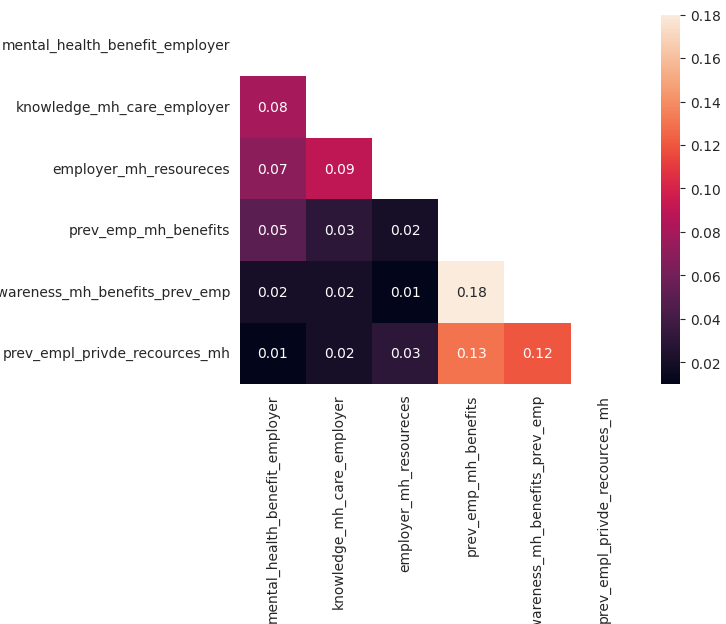

In [80]:
#generate heatmap to matrix
mask = np.zeros_like(df)#, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True




with sns.axes_style("white"):
  #ax = sns.heatmap(df, mask=mask,vmin=0., vmax=1, square=True)
   ax = sns.heatmap(df, mask = mask, annot = True)
plt.show()

### Covariance Matrix

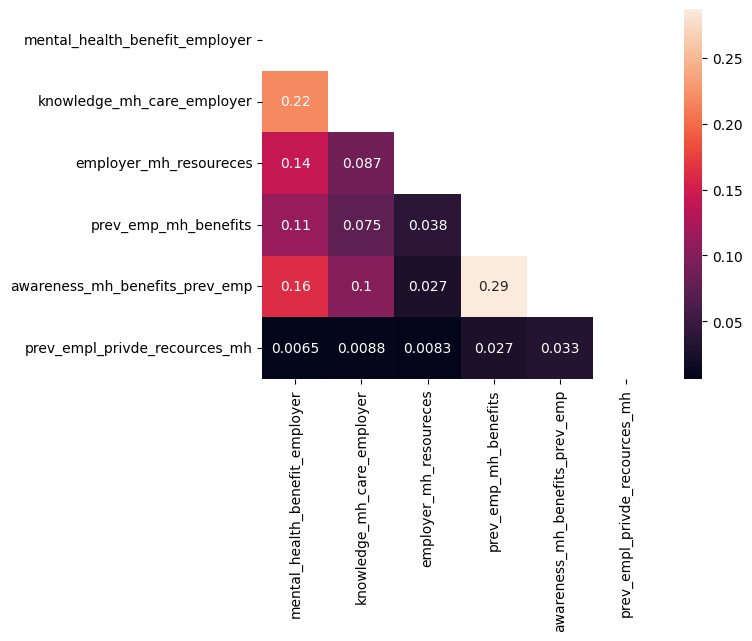

In [ ]:
#use encoded data to generate covariance matrix
cov_matrix = data_encoded.cov()
sns.heatmap(cov_matrix, mask = mask, annot=True)
plt.show()
